In [1]:
# Data Analysis
import warnings 
warnings.filterwarnings('ignore')
    
import pandas as pd
import numpy as np
import os 
import missingno as msno
import matplotlib.pyplot as plt

import math
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

    
# Data View
pd.options.display.max_columns = 200

# Import Basic Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

os.chdir('C:\\Users\\jason\\OneDrive\\Desktop\\NCU\\8535_Univariate Analysis\\Week 5')

In [2]:
#Extract dataset
df_raw= pd.read_csv("C:\\Users\\jason\\OneDrive\\Desktop\\NCU\8535_Univariate Analysis\\Week 5\\produce_sales.csv")
df_raw.head()

,month,sales
0,2/7/2018,226.0
1,2/8/2018,185.9
2,2/9/2018,145.9
3,2/10/2018,315.9
4,2/11/2018,122.9


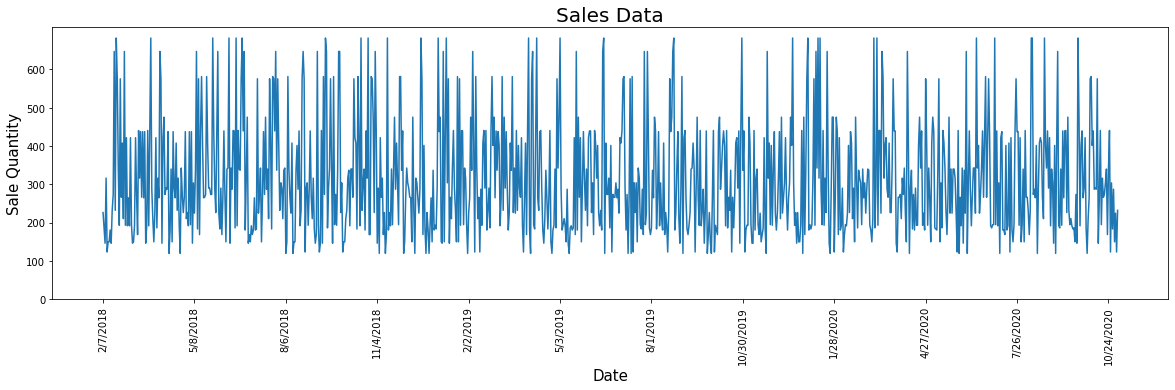

<Figure size 360x360 with 0 Axes>

In [3]:
#plot daily dataset
x = df_raw['month']
y = df_raw['sales'].values
plt.figure(figsize=(20,5))
plt.rcParams.update({'font.size':10})
plt.plot(x,y,)
plt.title('Sales Data', fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Sale Quantity',fontsize=15)
plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(x), 90))
plt.yticks(np.arange(0, max(y), 100))
plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size':10})
plt.show()

In [4]:
#create new variable for with month_year
df_raw["month"] = pd.to_datetime(df_raw['month']).dt.to_period('D')

In [5]:
#Preparing the training data
sales = df_raw['sales']
values = sales.values
training_data_len = math.ceil(len(values)*0.8)#split_fraction = training_data_len

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

lbk = 60

for i in range (lbk, len(train_data)):
    x_train.append(train_data[i-lbk:i, 0])
    y_train.append(train_data[i, 0])

x_train,y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [6]:
#Preparing the test data

test_data = scaled_data[training_data_len-lbk: , :]
x_test = []
y_test = values[training_data_len:]

for i in range(lbk, len(test_data)):
    x_test.append(test_data[i-lbk:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [7]:
#LSTM Network Architecture

model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [8]:
#Training LSTM 

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, batch_size=800, epochs=3000)



Epoch 1/3000
1/1 [==============================] - 4s 4s/step - loss: 0.1515
Epoch 2/3000
1/1 [==============================] - 1s 585ms/step - loss: 0.0940
Epoch 3/3000
1/1 [==============================] - 1s 635ms/step - loss: 0.0743
Epoch 4/3000
1/1 [==============================] - 1s 550ms/step - loss: 0.0948
Epoch 5/3000
1/1 [==============================] - 1s 552ms/step - loss: 0.0893
Epoch 6/3000
1/1 [==============================] - 1s 617ms/step - loss: 0.0777
Epoch 7/3000
1/1 [==============================] - 1s 567ms/step - loss: 0.0741
Epoch 8/3000
1/1 [==============================] - 1s 609ms/step - loss: 0.0759
Epoch 9/3000
1/1 [==============================] - 1s 592ms/step - loss: 0.0789
Epoch 10/3000
1/1 [==============================] - 1s 539ms/step - loss: 0.0804
Epoch 11/3000
1/1 [==============================] - 1s 559ms/step - loss: 0.0801
Epoch 12/3000
1/1 [==============================] - 1s 607ms/step - loss: 0.0785
Epoch 13/3000
1/1 [=========

In [9]:
#Model evaluation

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

7/7 [==============================] - 1s 20ms/step


84.12031004971266

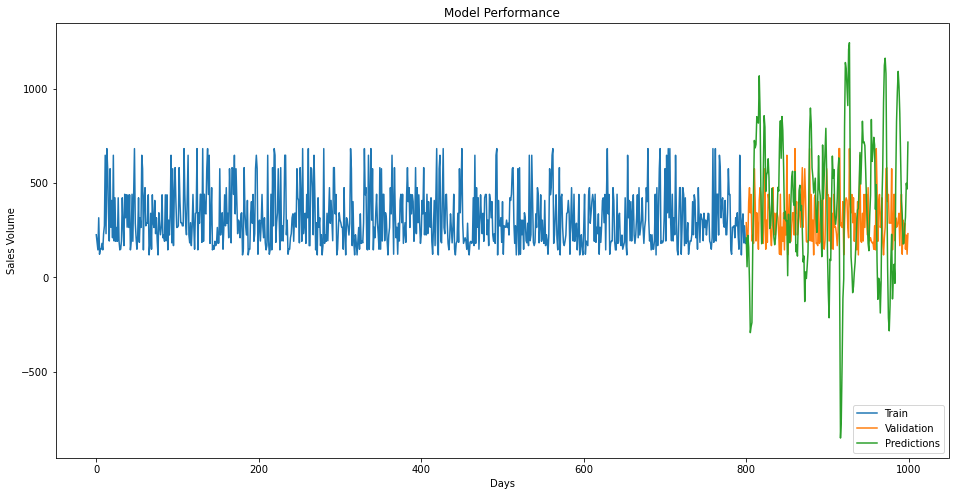

In [37]:
#Visualize Prediction Power
data = df_raw.filter(['sales'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model Performance', fontsize = 12)
plt.xlabel('Days')
plt.ylabel('Sales Volume')
plt.plot(train)
plt.plot(validation[['sales', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

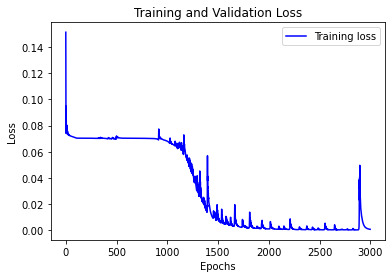

In [32]:
#plot perform by epochs
def visualize_loss(history, title):
    loss = history.history["loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

visualize_loss(history, "Training and Validation Loss")